## Fitness Watch Data - Clustering

Fitness watch data is data obtained from devices that track individuals’ physical activity, heart rate, sleep patterns, and other health indicators. Analysis of this data is important to better understand individuals’ health status and provide personalized recommendations. Cluster analysis helps to identify users or activities with similar characteristics by grouping this data. In this project, we will examine and organize our data. We will train our model with the columns we want to cluster and perform the clustering process.

<img src='fit.jpg' width=350 >

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('fitness_data.csv')
#Read the file.

## EDA- Exploratory Data Analysis

In [3]:
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


In [5]:
df.shape

(149, 8)

In [6]:
df.isnull().sum()

,0
Date,0
Time,0
Step Count,0
Distance,0
Energy Burned,0
Flights Climbed,0
Walking Double Support Percentage,0
Walking Speed,0


## Data Visualization

In [7]:
fig=px.line(df, x="Time",y="Step Count",title="Step Count Over Time")
fig.show()

In [8]:
fig=px.box(df, x="Date",y="Step Count",title="Step Count Over Date")
fig.show()

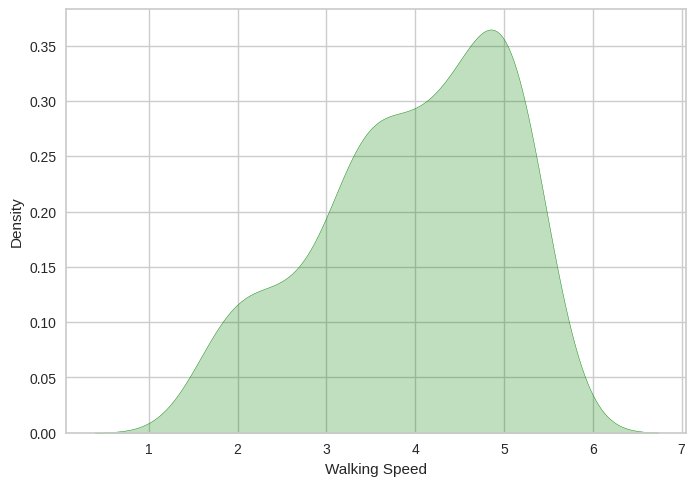

In [9]:
sns.kdeplot(x=df['Walking Speed'], fill=True, color='green');

In [10]:
fig=px.line(df, x="Time",y="Walking Speed",title="Walking Speed Over Time")
fig.show()

In [11]:
fig=px.bar(df, x="Time",y="Distance",title="Distance Over Time")
fig.show()

In [12]:
fig=px.line(df, x="Time",y="Energy Burned",title="Energy Burned Over Time")
fig.show()

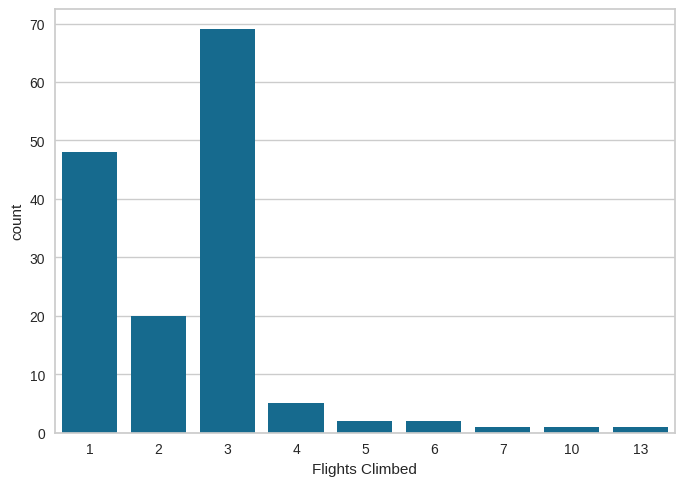

In [13]:
sns.countplot(x=df['Flights Climbed']);

In [14]:
fig=px.line(df, x="Time",y="Flights Climbed",title="Flights Climbed Over Time")
fig.show()

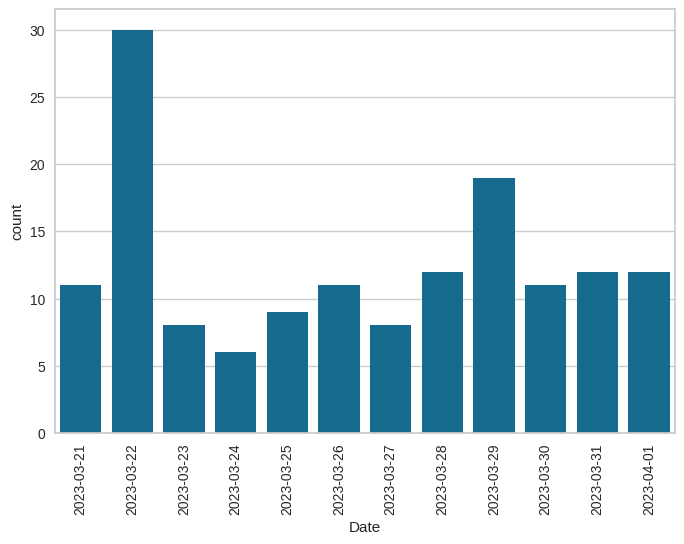

In [15]:
sns.countplot(x=df['Date'])
plt.xticks(rotation=90);

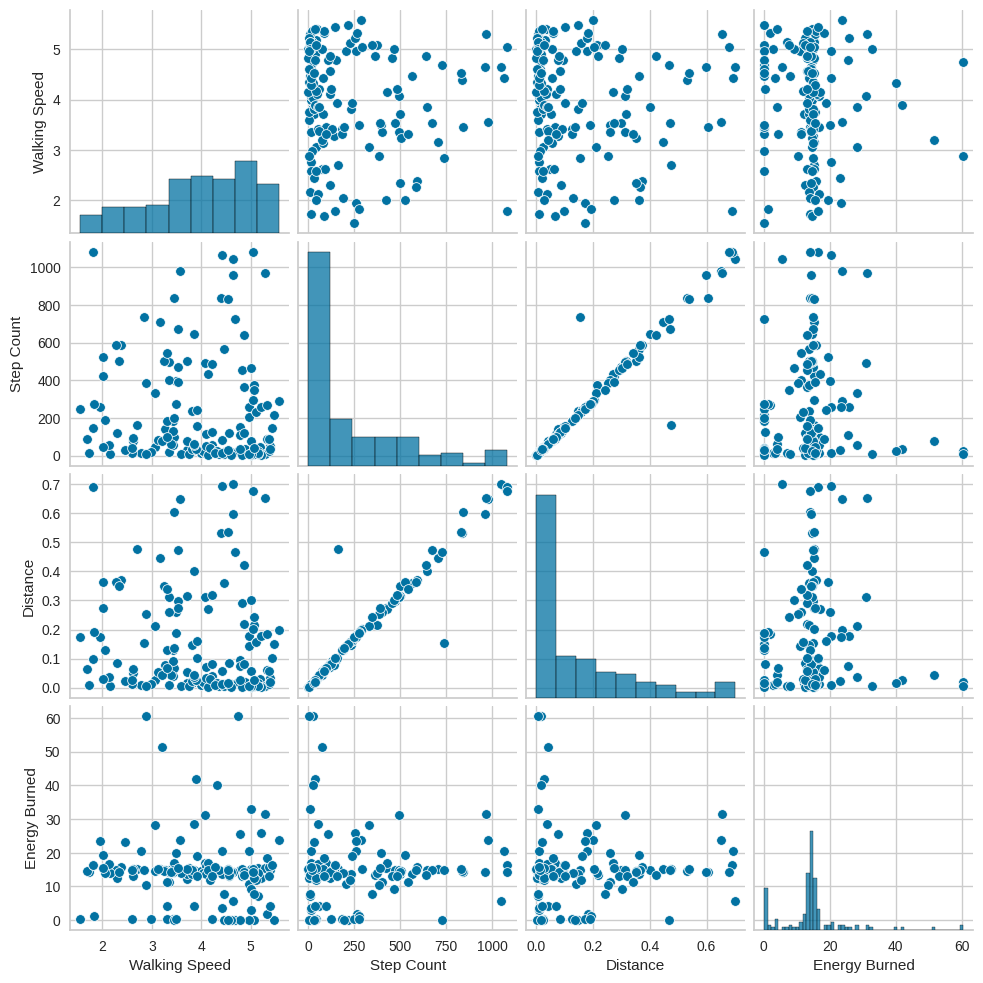

In [16]:
sns.pairplot(df[['Walking Speed', 'Step Count', 'Distance', 'Energy Burned']]);

## Modelling

### Clustering for Daily Activity Profiles

In [18]:
x=df[['Step Count','Distance', 'Energy Burned','Flights Climbed','Walking Speed']]

In [19]:
model=KMeans(4)

In [20]:
model=model.fit(x)

In [21]:
tahmin=model.predict(x)

In [22]:
x['cluster']=tahmin

In [23]:
silhouette_score(x, tahmin)

0.6563606612980158

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.7235917716062026
0.6944913908401185
0.6710727899311573
0.5965824202703308
0.6267178361917326
0.6108253184440582
0.6261268456036426
0.5765615435774814


### YellowBrick

In [52]:
#pip install yellowbrick

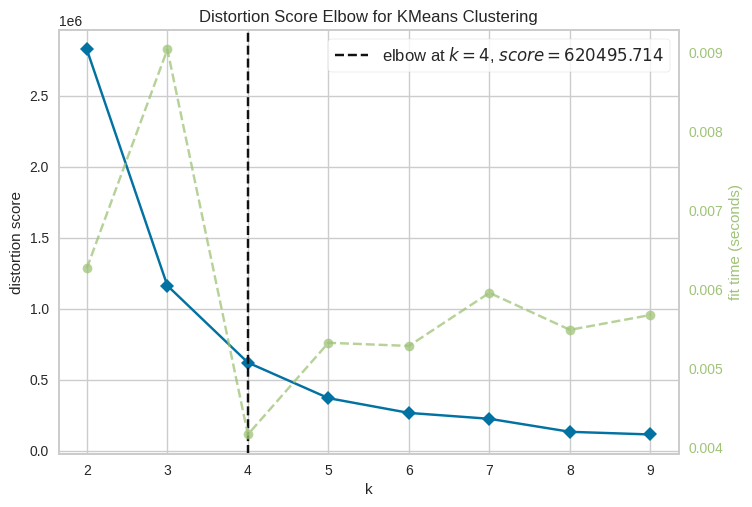

In [27]:
km=KMeans()
a=KElbowVisualizer(km,k=(2,10))
a.fit(x)
a.show();

In [28]:
x.head()

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Speed,cluster
0,46,0.02543,14.620,3,3.060,3
1,645,0.40041,14.722,3,3.852,2
2,14,0.00996,14.603,4,3.996,3
3,13,0.00901,14.811,3,5.040,3
4,17,0.00904,15.153,3,5.184,3


In [29]:
x[x.cluster==2]

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Speed,cluster
1,645,0.40041,14.722,3,3.852,2
6,564,0.36089,13.709,3,4.464,2
19,590,0.37101,15.871,3,2.376,2
20,425,0.27507,15.384,3,2.016,2
25,472,0.29817,14.793,3,3.528,2
28,492,0.31219,31.105,2,4.068,2
29,431,0.26924,17.051,1,4.140,2
30,502,0.31676,13.758,4,3.708,2
32,587,0.36479,15.006,1,2.268,2
33,496,0.31120,14.777,3,3.348,2


In [30]:
x['cluster'].value_counts()

,count
cluster,
3,84
0,27
2,25
1,13


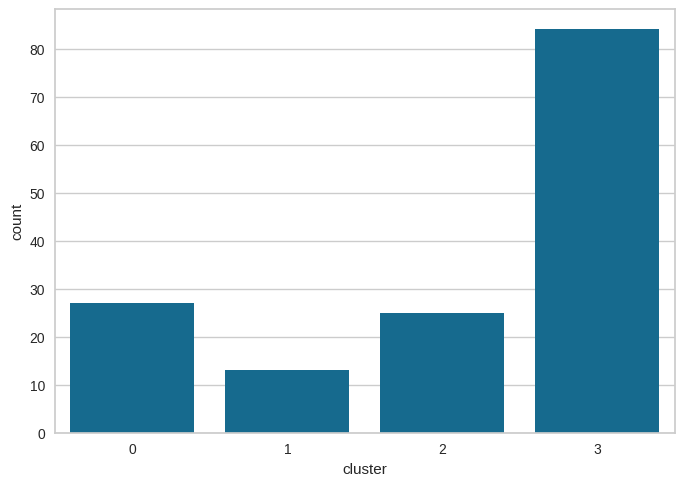

In [31]:
sns.countplot(x=x['cluster']);

### Dendrogram

In [33]:
data=linkage(x, method='ward', metric='euclidean')

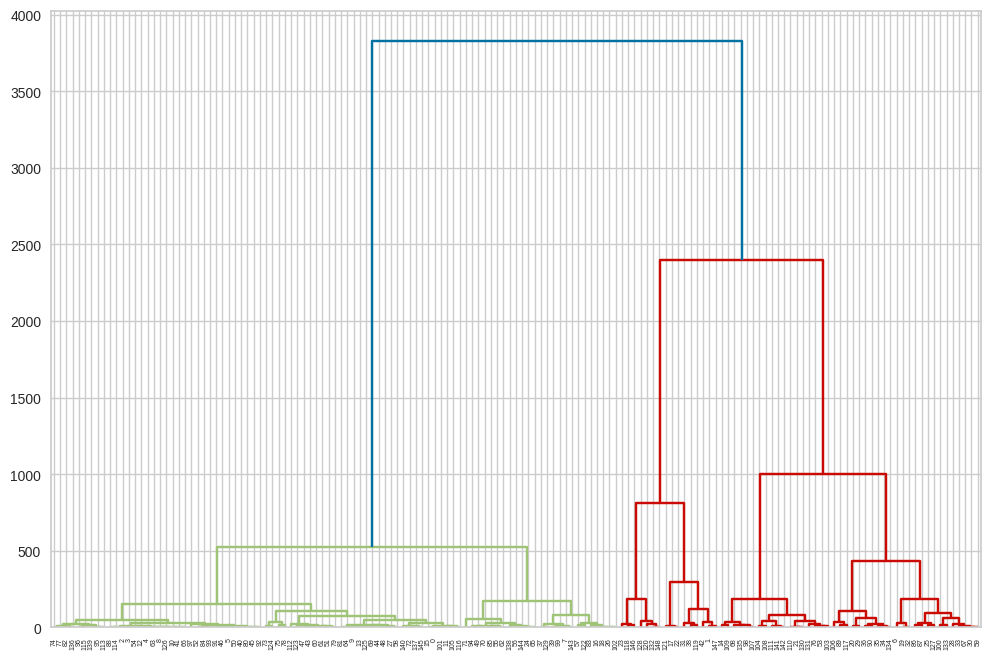

In [34]:
plt.figure(figsize=(12,8))
dendrogram(data);

### Clustering for Walking Analysis 

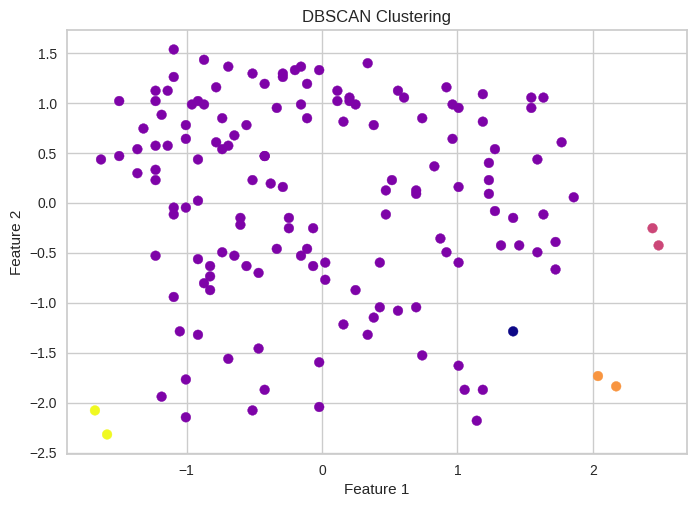

In [36]:
x=df[['Walking Double Support Percentage','Walking Speed']]

# Scaling the data (Scaling is important since DBSCAN works based on distance)
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Creating a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=2)

# Fitting the model to the data
dbscan.fit(x)

# Cluster labels
labels = dbscan.labels_

# Cluster visualization
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [37]:
# Convert cluster labels to pandas series
labels=pd.Series(labels)

labels.value_counts()

,count
0,142
1,2
2,2
3,2
-1,1


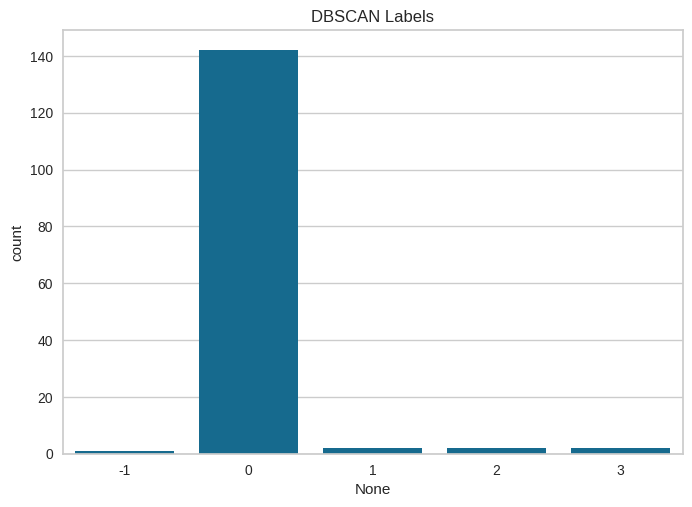

In [38]:
sns.countplot(x=labels)
plt.title('DBSCAN Labels');

### Clustering for Time Based Activity

In [40]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [41]:
df['Time'] = df['Time'].str.strip()
df['Time']=pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

In [42]:
x=df[['Year','Month','Day','Hour','Minute','Step Count','Energy Burned']]

In [43]:
model=KMeans(4)

In [44]:
model=model.fit(x)

In [45]:
tahmin=model.predict(x)

In [46]:
x['time_based']=tahmin

In [47]:
silhouette_score(x, tahmin)

0.6405756760950085

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.7139875696602199
0.6749773018440255
0.6185624917589616
0.6219988322460216
0.5832482720188896
0.5253961228694295
0.43992181228623695
0.4339530117184028


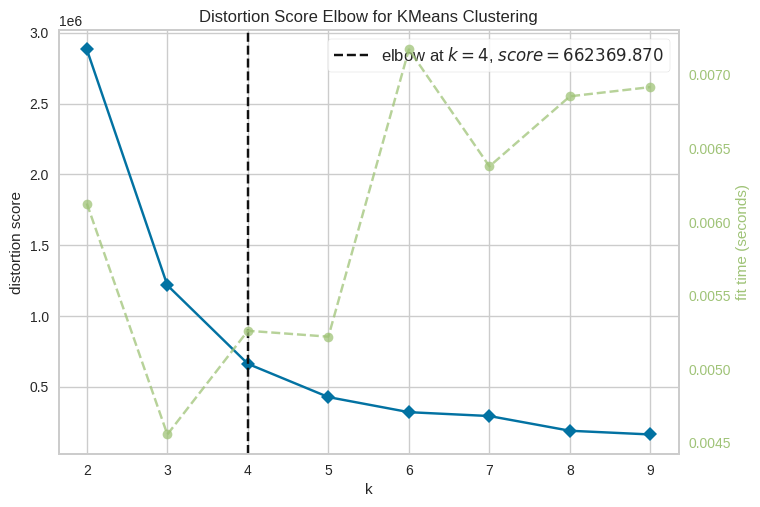

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
km=KMeans()
a=KElbowVisualizer(km,k=(2,10))
a.fit(x)
a.show()

In [50]:
x['time_based'].value_counts()

,count
time_based,
1,91
3,26
0,22
2,10


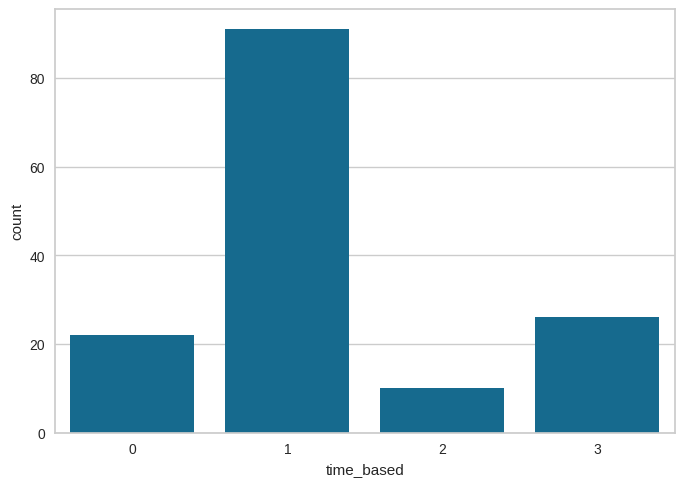

In [51]:
sns.countplot(x=x['time_based']);

## Summary

The clustering study we conducted using fitness watch data was conducted to analyze users' daily activities, walking and balance status. We created groups with similar characteristics by dividing different activities of users into segments based on fitness tracker data.

Daily Activity Segmentation: Segments were created based on users' daily activities. This is important for understanding users' daily performances.

Walking Segmentation: Grouping walking activities with measurements such as walking times, distances and speeds. This segmentation helps analyze users' walking habits.

Time-Based Segmentation: Segments were created to understand the change in activities over time by grouping data according to specific time periods.

User groups with similar characteristics were determined using clustering algorithms such as K-Means or DBSCAN. These methods allow finding meaningful relationships between users' activities.

User Groups: Users were divided into different segments according to their daily activities, walking times and balance status. This allows users to provide customized recommendations to support their healthy lifestyle.

This cluster analysis with fitness watch data is an effective method to understand users’ daily activities and walking status. This process provides important information to improve user experience and provide personalized health solutions.